In [1]:
#import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('C:../PreML/DescriptorsDataset.csv')
X = data[['AXp-0d', 'AXp-1d', 'AXp-2d', 'ETA_eta_L', 'ETA_epsilon_3']].values
y = data[['e_gap_alpha']].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1234)

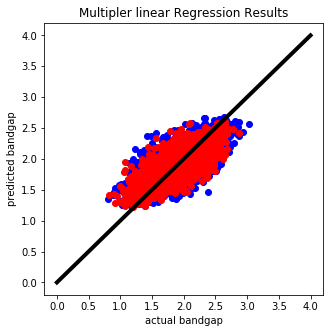

In [5]:
MLR = linear_model.LinearRegression()
MLR.fit(X_train,y_train)
testpred = MLR.predict(X_test)
trainpred = MLR.predict(X_train)
plt.figure(figsize=(5,5))
plt.scatter(y_train,trainpred,color='blue')
plt.scatter(y_test,testpred,color='r')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Multipler linear Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')
plt.show()

In [24]:
Error = []
sumerror = 0
for i in range(len(trainpred)):
    error1 = (y_train[i] - trainpred[i])**2
    sumerror += error1
    Error.append(error1)

In [25]:
len(Error)

7500

In [27]:
for i in range(len(testpred)):
    error1 = (y_test[i] - testpred[i])**2
    sumerror += error1
    Error.append(error1)

In [28]:
sumerror

array([461.50563817])

D:\Users\Lloyd\Miniconda3\envs\keras1.0\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


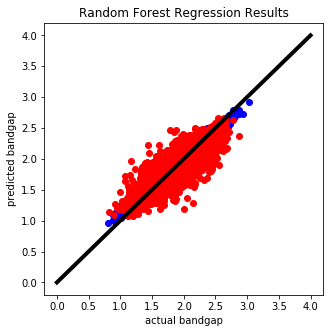

In [30]:

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train,y_train)

# Predicting a new result with the Random Forest Regression

Ytrain_Pred = regressor.predict(X_train)
Ytest_Pred = regressor.predict(X_test)

# Visualising the Random Forest Regression results in higher resolution and smoother curve
#X_Grid = np.arange(min(X), max(X), 0.01)
#X_Grid = X_Grid.reshape((len(X_Grid), 1))
plt.figure(figsize=(5,5))
plt.scatter(y_train,Ytrain_Pred, color = 'blue')
plt.scatter(y_test,Ytest_Pred, color = 'red')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Random Forest Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')
plt.show()

In [31]:
Error = []
sumerror = 0
for i in range(len(Ytrain_Pred)):
    error1 = (y_train[i] - Ytrain_Pred[i])**2
    sumerror += error1
    Error.append(error1)

In [32]:
for i in range(len(Ytest_Pred)):
    error1 = (y_test[i] - Ytest_Pred[i])**2
    sumerror += error1
    Error.append(error1)

In [33]:
sumerror

array([130.36462529])

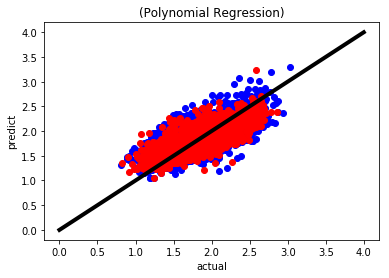

In [34]:
lin_reg = LinearRegression()
#lin_reg.fit(X, y)

# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

# Visualising the Linear Regression results
#plt.scatter(X, y, color = 'red')
#plt.plot(X, lin_reg.predict(X), color = 'blue')
#plt.title('Linear Regression')
#plt.xlabel('actual')
#plt.ylabel('predict')
#plt.show()

# Visualising the Polynomial Regression results
ytrain_Pred = lin_reg_2.predict(poly_reg.fit_transform(X_train))
ytest_Pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

plt.scatter(y_train,ytrain_Pred, color = 'blue')
plt.scatter(y_test,ytest_Pred, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('(Polynomial Regression)')
plt.xlabel('actual')
plt.ylabel('predict')
plt.show()

In [35]:
Error = []
sumerror = 0
for i in range(len(ytrain_Pred)):
    error1 = (y_train[i] - ytrain_Pred[i])**2
    sumerror += error1
    Error.append(error1)

In [36]:
for i in range(len(ytest_Pred)):
    error1 = (y_test[i] - ytest_Pred[i])**2
    sumerror += error1
    Error.append(error1)
sumerror

array([462.96177975])

In [43]:
len(Error)

10000

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

%matplotlib inline

Using TensorFlow backend.


In [38]:
# create the scaler from the training data only and keep it for later use
X_train_scaler = StandardScaler().fit(X_train)
# apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train)
X_test = X_train_scaler.transform(X_test)

In [39]:
from keras import regularizers

def neural_model():
    # assemble the structure
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(8, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    #model.add(Dense(4, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [40]:
# initialize the andom seed as this is used to generate
# the starting weights
np.random.seed(1234)
# create the NN framework
estimator = KerasRegressor(build_fn=neural_model,
        epochs=1200, batch_size=25000, verbose=0)
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs=1200, 
        batch_size=10000, verbose=0)
print("final MSE for train is %.2f and for validation is %.2f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
final MSE for train is 0.06 and for validation is 0.06


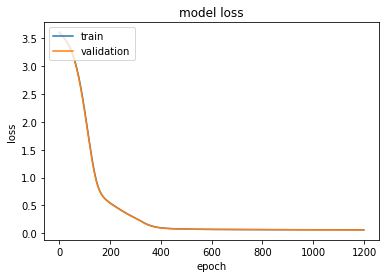

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

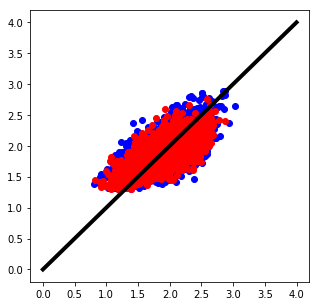

In [42]:
plt.figure(figsize=(5,5))
prediction = estimator.predict(X_test)
plt.scatter(y_train,estimator.predict(X_train), color = 'blue')
plt.scatter(y_test,prediction, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')

In [49]:
Error = []
sumerror = 0
for i in range(len(y_train)):
    error1 = (y_train[i] - estimator.predict(X_train)[i])**2
    sumerror += error1
    Error.append(error1)

In [50]:
for i in range(len(prediction)):
    error1 = (y_test[i] - prediction[i])**2
    sumerror += error1
    Error.append(error1)

In [51]:
sumerror

array([488.87532264])

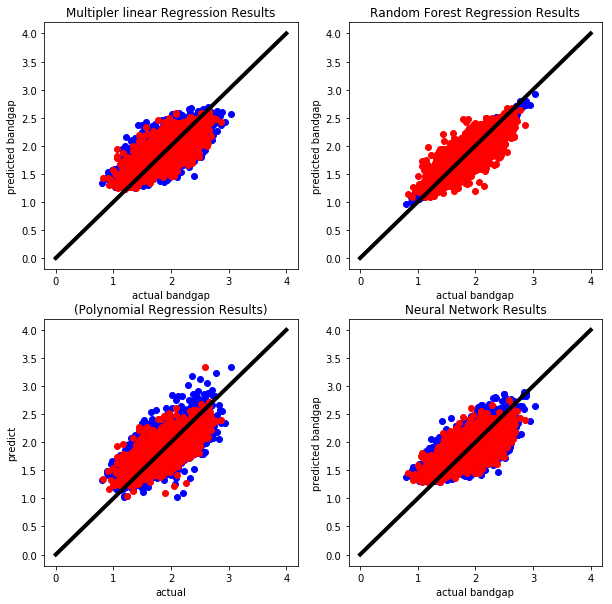

In [37]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
plt.scatter(y_train,trainpred,color='blue')
plt.scatter(y_test,testpred,color='r')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Multipler linear Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')

ax2 = plt.subplot(2,2,2)
plt.scatter(y_train,Ytrain_Pred, color = 'blue')
plt.scatter(y_test,Ytest_Pred, color = 'red')
#plt.plot(X_Grid, regressor.predict(X_Grid), color = 'black')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Random Forest Regression Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')

ax3 = plt.subplot(2,2,3)
plt.scatter(y_train,ytrain_Pred, color = 'blue')
plt.scatter(y_test,ytest_Pred, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('(Polynomial Regression Results)')
plt.xlabel('actual')
plt.ylabel('predict')

ax4 = plt.subplot(2,2,4)
prediction = estimator.predict(X_test)
plt.scatter(y_train,estimator.predict(X_train), color = 'blue')
plt.scatter(y_test,prediction, color = 'red')
plt.plot([0,4],[0,4],lw=4,color='black')
plt.title('Neural Network Results')
plt.xlabel('actual bandgap')
plt.ylabel('predicted bandgap')
plt.show()